# machine learning

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [136]:
# read data
data = pd.read_csv(r"C:\Users\chewei\Downloads\loan_train.csv")

In [77]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,credit_card,0.1197,481.40,11.775290,10.85,682,5071.000000,966,13.1,5,0,0,0
1,1,all_other,0.0907,238.75,11.002100,4.86,752,7626.958333,8575,25.0,1,0,0,0
2,1,debt_consolidation,0.1222,148.28,11.835009,19.00,677,6059.958333,27587,74.8,1,1,0,0
3,1,all_other,0.0774,156.10,10.803649,4.71,797,4200.041667,1299,4.2,2,0,0,0
4,0,major_purchase,0.1253,267.73,10.819778,21.29,697,3060.041667,34938,59.6,4,1,0,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9478 entries, 0 to 9477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9478 non-null   int64  
 1   purpose            9478 non-null   object 
 2   int.rate           9478 non-null   float64
 3   installment        9478 non-null   float64
 4   log.annual.inc     9478 non-null   float64
 5   dti                9478 non-null   float64
 6   fico               9478 non-null   int64  
 7   days.with.cr.line  9478 non-null   float64
 8   revol.bal          9478 non-null   int64  
 9   revol.util         9478 non-null   float64
 10  inq.last.6mths     9478 non-null   int64  
 11  delinq.2yrs        9478 non-null   int64  
 12  pub.rec            9478 non-null   int64  
 13  not.fully.paid     9478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [79]:
# 檢查缺失值與data是否重複
print(data.isnull().sum())
print('duplicate: ', data.duplicated().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
duplicate:  0


In [80]:
data['purpose'].value_counts()

purpose
debt_consolidation    3917
all_other             2311
credit_card           1249
home_improvement       621
small_business         612
major_purchase         431
educational            337
Name: count, dtype: int64

C:\Users\chewei\AppData\Local\Temp\ipykernel_1832\2162416692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=data, palette='Blues')


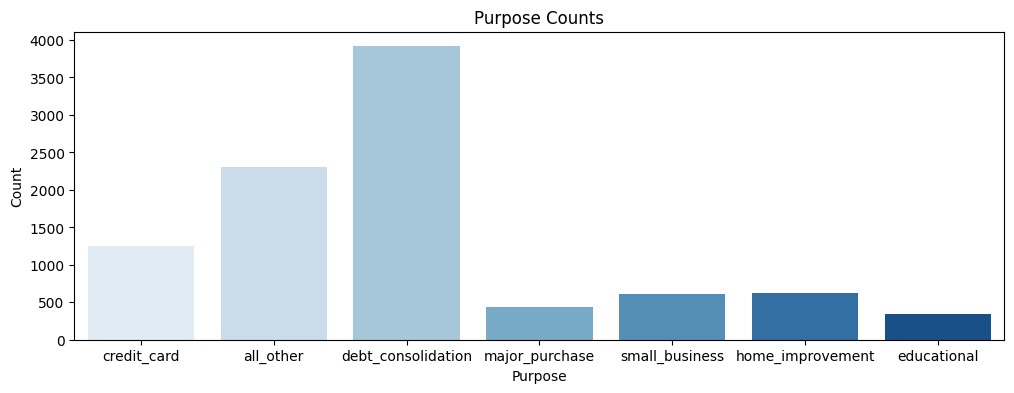

In [81]:
plt.figure(figsize=(12, 4))
sns.countplot(x='purpose', data=data, palette='Blues')
plt.title('Purpose Counts')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

## 處理 purpose
1. dummy varialbe
2. Label Encoder

In [83]:
# dummy variables
dummyData = data.copy(deep=True)
    dummyData = pd.get_dummies(dummyData, columns=['purpose'], drop_first=True)
    dummyData

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0.1197,481.40,11.775290,10.85,682,5071.000000,966,13.1,5,0,0,0,True,False,False,False,False,False
1,1,0.0907,238.75,11.002100,4.86,752,7626.958333,8575,25.0,1,0,0,0,False,False,False,False,False,False
2,1,0.1222,148.28,11.835009,19.00,677,6059.958333,27587,74.8,1,1,0,0,False,True,False,False,False,False
3,1,0.0774,156.10,10.803649,4.71,797,4200.041667,1299,4.2,2,0,0,0,False,False,False,False,False,False
4,0,0.1253,267.73,10.819778,21.29,697,3060.041667,34938,59.6,4,1,0,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9473,1,0.1253,133.87,10.858999,1.34,742,1770.000000,2386,11.3,4,0,0,1,False,False,False,True,False,False
9474,1,0.1253,167.34,10.308953,0.00,697,1860.000000,0,0.0,1,1,0,1,False,False,True,False,False,False
9475,1,0.1461,861.88,11.695247,20.52,707,5580.000000,78468,84.3,2,0,0,1,True,False,False,False,False,False
9476,1,0.0894,305.01,11.350407,12.01,742,5039.958333,47474,56.1,0,0,0,1,False,False,False,False,False,False


In [84]:
# Label Encoder
labelEncoderData = data.copy(deep=True)
label_encoder = LabelEncoder()
labelEncoderData['purpose'] = label_encoder.fit_transform(labelEncoderData['purpose'])
labelEncoderData

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,0.1197,481.40,11.775290,10.85,682,5071.000000,966,13.1,5,0,0,0
1,1,0,0.0907,238.75,11.002100,4.86,752,7626.958333,8575,25.0,1,0,0,0
2,1,2,0.1222,148.28,11.835009,19.00,677,6059.958333,27587,74.8,1,1,0,0
3,1,0,0.0774,156.10,10.803649,4.71,797,4200.041667,1299,4.2,2,0,0,0
4,0,5,0.1253,267.73,10.819778,21.29,697,3060.041667,34938,59.6,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9473,1,4,0.1253,133.87,10.858999,1.34,742,1770.000000,2386,11.3,4,0,0,1
9474,1,3,0.1253,167.34,10.308953,0.00,697,1860.000000,0,0.0,1,1,0,1
9475,1,1,0.1461,861.88,11.695247,20.52,707,5580.000000,78468,84.3,2,0,0,1
9476,1,0,0.0894,305.01,11.350407,12.01,742,5039.958333,47474,56.1,0,0,0,1


## 極端值處理：
1. 刪除極端值
2. 替換邊界，使用IQR或是3*std
3. 取對數
4. decsion tree, random forest 對極端值不敏感
5. 無監督學習，isolation forest, local outlier factor可檢測或是辨識極端值

In [86]:
skewColumns = ['int.rate', 'installment', 'dti', 'fico', 'days.with.cr.line', 'revol.util']
skewness = data[skewColumns].skew()
print(skewness)

int.rate             0.164135
installment          0.910142
dti                  0.023261
fico                 0.469720
days.with.cr.line    1.156222
revol.util           0.062470
dtype: float64


In [120]:
# installment IQR

def Outlier_IQR_counts(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    maxOutlier = Q3 + IQR*1.5
    minOutlier = Q1 - IQR*1.5
    outlierCount = ((data[column] > maxOutlier) | (data[column] < minOutlier)).sum()
    return outlierCount

print(Outlier_IQR_counts('installment'))
print(Outlier_IQR_counts('days.with.cr.line'))

def Outlier_IQR(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    maxOutlier = Q3 + IQR*1.5
    minOutlier = Q1 - IQR*1.5
    data[column] = data[column].clip(lower=minOutlier, upper=maxOutlier)

Outlier_IQR('installment')
Outlier_IQR('days.with.cr.line')

0
0


In [134]:
# int.rate 取ln
data['int.rate'] = np.log(data['int.rate'])

## 標準化
1. Standardization()
2. Min-Max Scaling()